### Power-Grid graphical model
a power grid graphical model is a graph $G = (V, E)$ where $V$ is the set of busses. Each $v\in V$ has both power consume $c_v$ and power supply $g_v$. A node $v\in V$ acts like a consumer if $c_v < g_v$ (usually for consumers $g_v=0$) and like a generator if $c_v > g_v$. $Y$ is the weighted adjacency matrix where $Y_{ij}$ is the admittance of the power line between nodes $i$ and $j$. In general we assign i-th vertex (bus) the phase angle $\theta_i$ and power generation $g_i$ and power consumption $c_i$ so that effective power gen is $p_i = g_i - c_i$. 

Thus we can express our power grid $G(V, E)$ in terms of the following ratings:

Line admittance matrix: $Y \in \mathbb{C}^{|E|\times |E|}$ matrix (it also contains information about the physical connections of the lines i.e. the graph adjacence matrix or the line avaiblity matrix $Z := \mathbb{1}_{\{Y\neq 0\}}$)

max and min phase angle vectors: $\theta^{max} = \{\theta_i^{max}\}, \theta^{min} = \{\theta_i^{min}\} \in \mathbb{R}^{|V|}$

max and min power generation rating vectors: $g^{max}=\{g_i^{max}\} \in \mathbb{R}^{|V|}, g^{min}=\{g_i^{min}\} \in \mathbb{R}^{|V|}$

max and min power consumption rating vectors: $c^{max}=\{c_i^{max}\} \in \mathbb{R}^{|V|}, c^{min}=\{c_i^{min}\} \in \mathbb{R}^{|V|}$ 

At the $i$-th node/bus the load shedding $s_i$ is defined from:
$$
g_i - c_i + s_i = \sum_{j\sim i} f_{ij} \implies g-c+s = L_Y\theta\,,\quad f_{ij} = Y_{ij} \left( \theta_i - \theta_j \right) \implies F = \{f_{ij}\} = diag(Y) A_G^\top \theta
$$
where $L_Y \in \mathbb{R}^{|V|\times |V|}$ is the laplacian of $Y$ and $A_G \in \{-1,0,1\}^{|V|\times |E|}$ is the signed node-edge incinence matrix (each column of $A_G$ has a +$1$ at the tail node and $−1$ at the head node) of graph $G$.

Since load shedding at a bus cann't be negative or greater than its demand/consumption, we have the bound $0 \leq s_i \leq c_i$. And hence the total load shedding in a power grid can be expressed as:
$$
S = \sum_{i \in V} s_i
$$

The goal is to find a configuration of optimal power flows that satisfies all consumer and generation demands while minimizing the total power loss (load shedding) in the network i.e.
$$
\min_{g, c, \theta, s} S
$$
such that $(g, c, \theta, s)$ satisfies:

the equalities (node balance and flow equation):
$$
g_i - c_i + s_i = \sum_{j\sim i} f_{ij} \implies g-c+s = L_Y\theta\,,\quad 
f_{ij} = Y_{ij}(\theta_i - \theta_j)
$$
and the inequalities (rating bounds)
$$
g \in [g^{min}, g^{max}]\,,\quad c \in [c^{min}, c^{max}]\,,\quad \theta \in [\theta^{min}, \theta^{max}]\,,\quad s \in [0, c^{max}]
$$

So we (i.e. the operator) have the power grid $G(V,E)$ with the rating dataset $(Y, g^{min}, g^{max}, c^{min}, c^{max}, \theta^{min}, \theta^{max})$ as input and we (the operator) have to find the optimal power flow operation i.e. the output $(g^*, c^*, \theta^*, s^*)$ which minimizes total load shedding $S$.

### Attack-Defend model
if $a_{ij} \in \{0, 1\}$ denotes attack on $ij$-th line and $d_{ij} \in \{0, 1\}$ denotes defense on $ij$-th line, the load flow equation becomes:
$$
f_{ij}' = z_{ij}f_{ij}\,,\quad z_{ij} = 1 - a_{ij}(1-d_{ij})
$$
So, $Z(a, d) = \{z_{ij}\}$ is the line availability matrix and $a, d \in \{0,1\}^{|E|}$. Note that both $a_{ij} = d_{ij} = 0$ whenever $Y_{ij} = 0$ i.e. there should be a physical line between buses $i$ and $j$.


### Main tri-level optimization formulation
Given the $n$-bus power grid graphical model $G=(V, E)$ and the attack-defend model with attack capacity $A$ and defence capacity $D$, we can formulate the following tri-level optimization problem to minimize load shedding while considering potential attacks and defenses on the power lines:
$$
\min_{d\in \{0,1\}^{|E|}, d^\top 1 \leq D} \max_{a\in \{0,1\}^{|E|}, a^\top 1 \leq A} \min_{g \in [g^{min}, g^{max}], c \in [c^{min}, c^{max}], \theta \in [\theta^{min}, \theta^{max}], s \in [0, c^{max}]} S
$$


In [ ]:
# Placeholder cell (kept minimal). Remove if undesired.


### Usage Examples Overview
Below are comprehensive, numbered usage patterns for the attack-defense DC power flow simulation model. Each section has a short description followed by an executable code block.

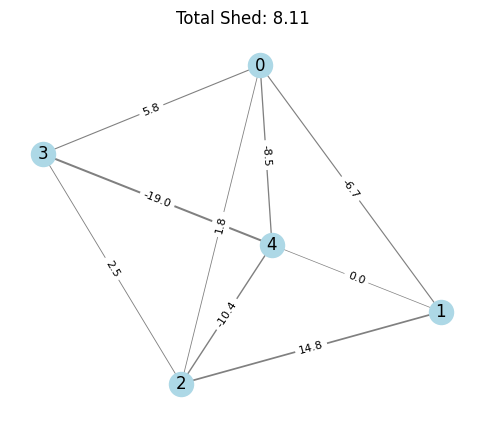

interactive(children=(IntSlider(value=0, description='Attack k', max=5), Output()), _dom_classes=('widget-inte…

Output()

In [7]:
from grid_sim import random_grid, solve_dispatch_min_shed, solve_attack_max_shed, solve_defense_min_shed
from grid_sim.viz import plot_grid, interactive_attack_defense
model = random_grid(5, 0.75, seed=3)
base = solve_dispatch_min_shed(model)
plot_grid(model, base)
interactive_attack_defense(model, max_attack=5)

#### 1. Basic random grid + optimal dispatch
Creates a small random grid and solves the minimal load shedding dispatch.

In [8]:
from grid_sim import random_grid, solve_dispatch_min_shed
model1 = random_grid(n_buses=8, density=0.4, seed=1)
res1 = solve_dispatch_min_shed(model1)
print('Total shed:', res1['total_shed'])
res1['g'], res1['shed']



Total shed: 140.5759757


({0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 64.926574,
  4: 0.0,
  5: 83.35074,
  6: 71.521817,
  7: 0.0},
 {0: 5.2515387,
  1: 3.760253,
  2: 23.413138,
  3: 0.0,
  4: 41.797208,
  5: 0.0,
  6: 0.0,
  7: 66.353838})

#### 2. Manual grid construction
Manually defines a 3-bus system and solves dispatch.

In [31]:
from grid_sim.model import GridModel
import networkx as nx
G2 = nx.Graph()
G2.add_nodes_from([0,1,2])
G2.add_edge(0,1,b=12.0,capacity=100)
G2.add_edge(1,2,b=9.0,capacity=80)
gmin2 = {0:0,1:0}
gmax2 = {0:120,1:50}
cmin2 = {0:0,1:0,2:0}
cmax2 = {0:40,1:60,2:70}
thetamin2 = {0:0,1:-1,2:3}
thetamax2 = {0:-5,1:7,2:70}
model2 = GridModel(G2,-0.8,0.8,gmin2,gmax2,cmin2,cmax2)
model2.demand = {0:40,1:60,2:70}
from grid_sim import solve_dispatch_min_shed
res2 = solve_dispatch_min_shed(model2)
res2['total_shed'], model2.export_data

(70.4,
 <bound method GridModel.export_data of GridModel(G=<networkx.classes.graph.Graph object at 0x000001428D09C280>, theta_min=-0.8, theta_max=0.8, g_min={0: 0, 1: 0}, g_max={0: 120, 1: 50}, c_min={0: 0, 1: 0, 2: 0}, c_max={0: 40, 1: 60, 2: 70}, baseMVA=100.0, susceptance={}, demand={0: 40, 1: 60, 2: 70}, gen_cost={})>)

#### 3. Single attack scenario
Computes worst-case shed for a single attack budget.

In [ ]:
from grid_sim import solve_attack_max_shed
atk3 = solve_attack_max_shed(model1, budget=2)
atk3['disabled'], atk3['total_shed']

#### 4. Sweep attack budgets
Shows how shedding increases as attack budget grows.

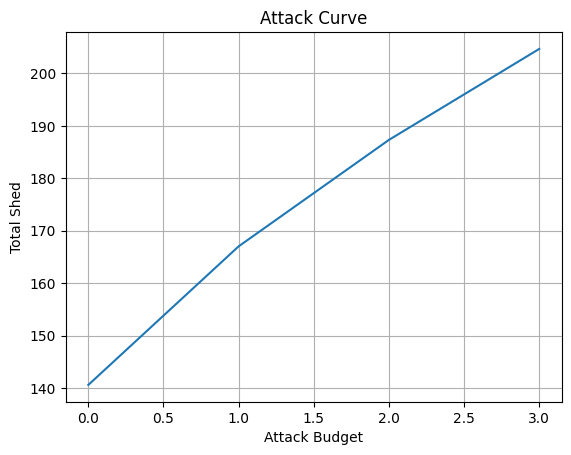

In [18]:
import matplotlib.pyplot as plt
atk_curve4 = {}
for k in range(0,4):
    atk_curve4[k] = solve_attack_max_shed(model1, budget=k)['total_shed']
atk_curve4
# plot
plt.plot(atk_curve4.keys(), atk_curve4.values())
plt.xlabel('Attack Budget')
plt.ylabel('Total Shed')
plt.title('Attack Curve')
plt.grid()
plt.show()

#### 5. Defense planning
Enumerates defense choices (small grids) to minimize worst-case shedding.

In [19]:
from grid_sim import solve_defense_min_shed
defense5 = solve_defense_min_shed(model1, attack_budget=2, defend_budget=2)
defense5['defended'], defense5['worst_case']['total_shed']

([(4, 5), (1, 3)], 174.43475569999998)

#### 6. Visual comparison (baseline / attack / defense)
Plots three states side by side.

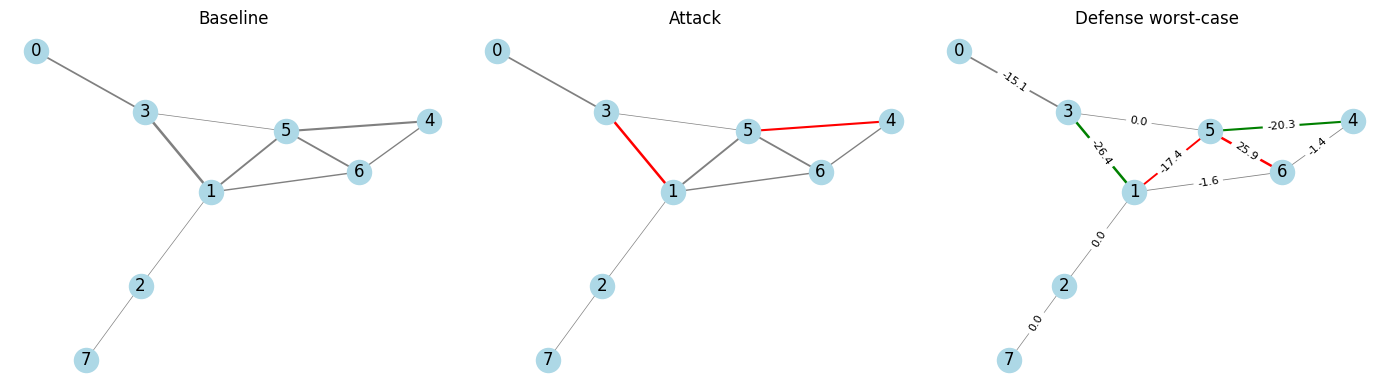

In [20]:
import matplotlib.pyplot as plt
from grid_sim.viz import plot_grid
base6 = solve_dispatch_min_shed(model1)
atk6 = solve_attack_max_shed(model1, budget=2)
def6 = solve_defense_min_shed(model1, attack_budget=2, defend_budget=2)
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot_grid(model1, base6, ax=axs[0]); axs[0].set_title('Baseline')
plot_grid(model1, atk6, disabled=atk6['disabled'], ax=axs[1]); axs[1].set_title('Attack')
plot_grid(model1, def6['worst_case'], disabled=def6['worst_case']['disabled'], defended=def6['defended'], ax=axs[2]); axs[2].set_title('Defense worst-case')
plt.tight_layout()

#### 7. Interactive attack explorer
Use ipywidgets to vary attack size.

In [21]:
from grid_sim.viz import interactive_attack_defense
interactive_attack_defense(model1, max_attack=4)

interactive(children=(IntSlider(value=0, description='Attack k', max=4), Output()), _dom_classes=('widget-inte…

Output()

#### 8. Animation of a scripted history
Creates a simple animation across attack steps.

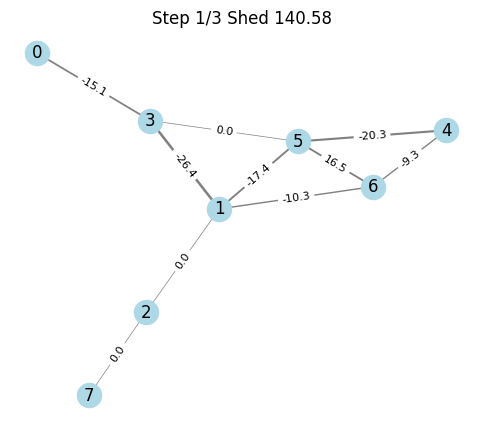

In [22]:
from grid_sim.viz import animate_attack_defense
hist8 = []
base8 = solve_dispatch_min_shed(model1)
hist8.append({'result': base8, 'disabled': [], 'defended': []})
for k in [1,2]:
    ares = solve_attack_max_shed(model1, budget=k)
    hist8.append({'result': ares, 'disabled': ares['disabled'], 'defended': []})
ani8 = animate_attack_defense(hist8, model1)
ani8

#### 9. Batch statistics over random seeds
Aggregates shedding statistics across multiple random instances.

In [23]:
import numpy as np
stats9 = []
for seed in range(10):
    m9 = random_grid(12, 0.4, seed=seed)
    base9 = solve_dispatch_min_shed(m9)['total_shed']
    atk9 = solve_attack_max_shed(m9, budget=2)['total_shed']
    stats9.append((base9, atk9))
avg_base9 = np.mean([b for b,_ in stats9])
avg_atk9 = np.mean([a for _,a in stats9])
avg_base9, avg_atk9

(313.815376112, 349.71601433399996)

#### 10. Sensitivity to defense budget
Evaluates worst-case shedding vs defense budget.

In [24]:
rows10 = []
for D in range(0,4):
    out10 = solve_defense_min_shed(model1, attack_budget=2, defend_budget=D)
    rows10.append((D, out10['worst_case']['total_shed']))
rows10

[(0, 187.3154437), (1, 178.2366567), (2, 174.43475569999998), (3, 172.185652)]

#### 11. Evaluate a specific outage set
Manually disable a line subset and re-run dispatch.

In [25]:
disabled11 = set([list(model1.G.edges())[0]])
custom11 = solve_dispatch_min_shed(model1, disabled_lines=disabled11)
custom11['total_shed']

155.67898

#### 12. Extract flows post-solution
Compute DC flows from angle differences.

In [26]:
flows12 = {}
theta12 = base6['theta'] if 'base6' in globals() else res1['theta']
for (i,j) in model1.G.edges():
    flows12[(i,j)] = model1.G[i][j]['b']*(theta12[i]-theta12[j])
flows12

{(0, 3): -15.103003753999127,
 (1, 2): 0.0,
 (1, 3): -26.43089518891563,
 (1, 5): -17.352107534830406,
 (1, 6): -10.286827383236172,
 (2, 7): 0.0,
 (3, 5): 0.0,
 (4, 5): -20.308572642805295,
 (4, 6): -9.251816075927257,
 (5, 6): 16.506672103456385}

#### 13. Custom reference bus workaround
Reorders nodes so desired bus becomes index 0 (simplistic).

In [27]:
desired_slack = list(model1.G.nodes())[0]  # example: already first
# (No action needed here because solver uses first bus)
print('Slack bus (approx):', desired_slack)

Slack bus (approx): 0


#### 14. Custom solver parameters placeholder
(Would modify solver call if exposing solver argument.)

In [28]:
# Not implemented: would pass custom pulp solver instance inside solve_dispatch_min_shed.
pass

#### 15. Export model data
Retrieve serializable structure of the grid.

In [29]:
export15 = model1.export_data()
list(export15.keys()), export15['lines'][:2]

(['buses', 'lines', 'g_min', 'g_max', 'c_min', 'c_max', 'demand'],
 [(0, 3, 19.229741707058658, 96.77471780157282),
  (1, 2, 16.3026966301221, 130.72149698289172)])

#### 16. Attack budgets on defended network (baseline enumeration)
(Here still using standard attacker for illustration.)

In [30]:
def_plan16 = solve_defense_min_shed(model1, attack_budget=3, defend_budget=2)
atk_perf16 = {}
for k in range(0,4):
    atk_perf16[k] = solve_attack_max_shed(model1, k)['total_shed']
def_plan16['defended'], atk_perf16

([(4, 5), (1, 3)],
 {0: 140.5759757, 1: 167.00687069999998, 2: 187.3154437, 3: 204.6675517})

#### 17. Result DataFrame
Combine generation and shedding into a pandas DataFrame.

In [ ]:
import pandas as pd
base_res17 = solve_dispatch_min_shed(model1)
shed_series17 = pd.Series(base_res17['shed'], name='shed')
gen_series17 = pd.Series(base_res17['g'], name='gen')
df17 = pd.concat([gen_series17, shed_series17], axis=1)
df17

#### 18. Minimal script entry (headless)
Demonstrates script-style usage (inline here for reference).

In [ ]:
m18 = random_grid(15, 0.3, seed=11)
shed18 = solve_attack_max_shed(m18, budget=2)['total_shed']
print('Attack shed example:', shed18)

#### 19. Monte Carlo defense value
Average improvement due to defense across random grids.

In [ ]:
def defense_value_19(n_runs=5):
    improvements = []
    for s in range(n_runs):
        m = random_grid(10,0.4,seed=s)
        base = solve_attack_max_shed(m, budget=2)['total_shed']
        def_res = solve_defense_min_shed(m, attack_budget=2, defend_budget=2)
        worst_after = def_res['worst_case']['total_shed']
        improvements.append(base - worst_after)
    return sum(improvements)/len(improvements)
defense_value_19()

#### 20. Vulnerability evaluation placeholder
(Direct feasibility of arbitrary (g,c,θ) not implemented.)

In [ ]:
# Placeholder: would implement feasibility & shedding impact checks for arbitrary (g,c,theta).
pass

#### 21. Capture complete scenario record
Collect baseline, attack, and defense outputs for export.

In [ ]:
scenario21 = {
  'model': model1.export_data(),
  'base': base6,
  'attack_budget_2': atk6,
  'defense': def6
}
list(scenario21.keys())

#### 22. Heuristic critical-line removal for large grids
Fallback when exhaustive enumeration is too expensive.

In [ ]:
if len(model1.lines) > 40:
    deg_sorted22 = sorted(model1.G.degree, key=lambda x: x[1], reverse=True)[:3]
    disabled22 = set()
    for (bus,_) in deg_sorted22:
        for nbr in model1.G.neighbors(bus):
            if len(disabled22) < 2:
                disabled22.add(tuple(sorted((bus,nbr))))
    heuristic22 = solve_dispatch_min_shed(model1, disabled_lines=disabled22)
    heuristic22['total_shed']
else:
    'Grid small: heuristic not applied'

#### 23. Serialize scenario to JSON
Write scenario dictionary to a JSON file.

In [ ]:
import json
with open('scenario_example23.json','w') as f:
    json.dump(scenario21, f, indent=2)
'scenario_example23.json written'

#### 24. Zero-shed condition check
Detects when no shedding occurs.

In [ ]:
base24 = solve_dispatch_min_shed(model1)
'Feasible without shedding' if base24['total_shed'] < 1e-6 else f"Shed={base24['total_shed']:.2f}"

#### 25. Plot baseline flows only (simple)
Re-uses plotting function.

In [ ]:
from grid_sim.viz import plot_grid
plot_grid(model1, base6)